# Is 2015 an extreme year?: Plotting GHCN-Daily record high and record low temperatures in Michigan area

Data: GHCN-Daily from The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe 

variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Goal: 

-plot line graphs of the record high and record low temperatures by day of the year over the period 2005-2014

-Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015 to find out if 2015 is an extreme year

## Loading the dataset, transforming data into Celsius (refer to documentation) then extracting all the daily max and min temperatures for each day of the years 2005 through 2015


In [10]:
import matplotlib
import pandas as pd
import numpy as np

df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# transform Data_Value to celcious and date to date format
df['Data_Value'] = df['Data_Value']/10
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# get min max values by date
min_max_df = df.groupby('Date').agg({'Data_Value': ['min', 'max']})

# dropping 29 feb values
def dated_Feb29(df):
    return (df.index.month == 2) & (df.index.day == 29)

mask = dated_Feb29(min_max_df)
min_max_df = min_max_df.loc[~mask]

display(min_max_df.head())



Data_Value      
                  min   max
Date                       
2005-01-01       -5.6  15.6
2005-01-02       -5.6  13.9
2005-01-03        0.0  13.3
2005-01-04       -3.9   3.9
2005-01-05       -9.4   3.3

## now finding record temperatures for every day of a calendar year in period 2004-2014 (e.g., the hottest January first there has been throughout years 2004 and 2014) and  minimum and maximum values just for 2015 to see if 2015 has been an extreme year


In [12]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014
for2005_to2014 = min_max_df[min_max_df.index.year != 2015]
# dropping multilevel of column that was created when using agg. function
for2005_to2014 = for2005_to2014.droplevel(0, axis=1)
# extracting day of year to use with groupby later
for2005_to2014['Day of Year'] = for2005_to2014.index.strftime('%m-%d')
for2005_to2014_byDayofYear = for2005_to2014.groupby('Day of Year').agg({'min': ['min'], 'max':['max']})
# dropping multilevel of column that was created when using agg. function
for2005_to2014_byDayofYear = for2005_to2014_byDayofYear.droplevel(0, axis=1)

# calculate the minimum and maximum values for the years 2015
for2015 = min_max_df[min_max_df.index.year == 2015]
for2015 = for2015.droplevel(0, axis=1)
for2015.index = for2015.index.strftime('%m-%d')


# 2015 values graterer o lower than 2004-2015
final_df = for2015.join(for2005_to2014_byDayofYear, lsuffix='_2015', rsuffix='_2005-2014')
final_df['Abs. min (2015)'] = np.where(final_df['min_2015'] > final_df['min_2005-2014'], np.nan, final_df['min_2015'])
final_df['Abs. max (2015)'] = np.where(final_df['max_2015'] < final_df['max_2005-2014'], np.nan, final_df['max_2015'])

'''
abs_mins = final_df[['Abs. min (2015)']].copy()
abs_mins.dropna(inplace=True)

abs_max = final_df[['Abs. max (2015)']].copy()
abs_max.dropna(inplace=True)

display(abs_mins)
display(abs_max)
'''
display(final_df.tail())




,min_2015,max_2015,min_2005-2014,max_2005-2014,Abs. min (2015),Abs. max (2015)
Date,,,,,,
12-27,-0.6,8.3,-13.8,18.9,NaN,NaN
12-28,-3.9,6.1,-16.6,19.4,NaN,NaN
12-29,-3.9,10.0,-15.0,12.8,NaN,NaN
12-30,-2.2,6.7,-14.4,11.7,NaN,NaN
12-31,-5.6,1.7,-15.0,13.9,NaN,NaN


## Plotting line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot __only__ the daily 2015 temperatures that exceeded those values.

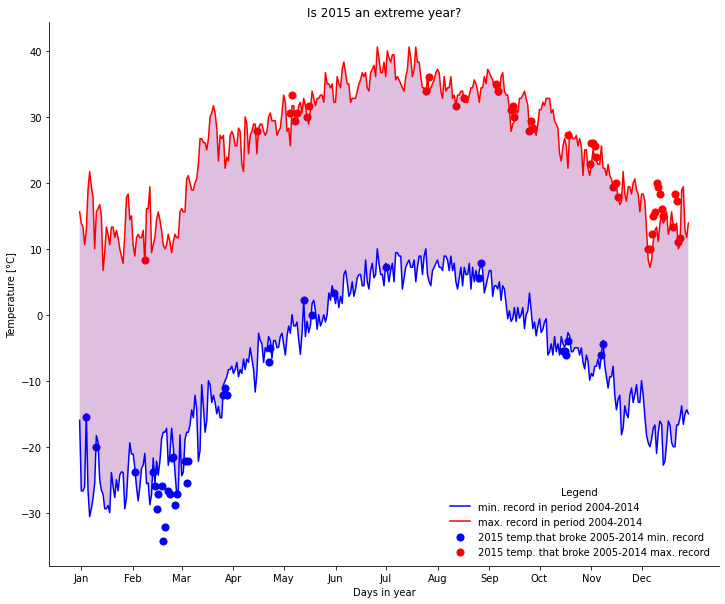

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from calendar import month_abbr

plt.figure(figsize=(12, 10))

# labels
#plt.xlabel("Months")
plt.xlabel("Days in year")
plt.ylabel("Temperature [°C]")
plt.title("Is 2015 an extreme year?")

#axis settings
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
months_list = [month_abbr[i] for i in range(1, 13)]
ax = plt.gca()
ax.set_xticks(month_starts)
ax.set_xticklabels(months_list)

#plots
plt.plot(final_df['min_2005-2014'], 'b', label='min. record in period 2004-2014')
plt.plot(final_df['max_2005-2014'], 'r', label='max. record in period 2004-2014')
plt.scatter(final_df.index, final_df['Abs. min (2015)'], s= 50, c='blue', label='2015 temp.that broke 2005-2014 min. record')
plt.scatter(final_df.index, final_df['Abs. max (2015)'], s= 50, c='red', label='2015 temp. that broke 2005-2014 max. record')


# colored area
plt.gca().fill_between(range(365), 
                       final_df['min_2005-2014'], final_df['max_2005-2014'], 
                       facecolor='purple', 
                       alpha=0.25)

#other settings
# remove the frame of the chart
ax.spines[['top', 'right']].set_visible(False)
plt.legend(loc=4, frameon=False, title='Legend');


